This notebook is based on an example from Dr. Federica Bianco.

In [7]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

#if os.geten('PUI2016') is None:
#    print ("Must set env variable PUI2016")
#if os.getenv ('PUIDATA') is None:
#    print ("Must set env variable PUI2016")
    
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)f    

Populating the interactive namespace from numpy and matplotlib


<h2>IDEA</h2>


There is higher usage of citibikes during rush hours on weekdays than during the same hours on weekends it <i>as a result of commuting.</i>

The ratio of rush hour trips to non-rush hour trips on weekdays is the same or smaller than the ratio of rush hour trips to non-rush hour trips on weekends.

I will use a significance level $\alpha=0.05$

which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [29]:
### This function is edited from Dr. Federica Bianco. 

def getCitiBikeCSV(datestring):
    os.chdir(os.getenv("PUIDATA"))
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
    ###  To move it I use the os.system() functions to run bash commands with arguments
    os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
    ### unzip the csv 
    os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")   



In [30]:
datestring = '201501'
getCitiBikeCSV(datestring)

In [78]:
df=pd.read_csv(os.getenv("PUIDATA")+'/' + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
df['new date'] = df['date']
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,new date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,2015-01-01 00:04:00


In [79]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'new date'],
      dtype='object')

In [80]:
df.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis = 1, inplace = True)

In [81]:
df.head(4)

,starttime,date,new date
0,1/1/2015 0:01,2015-01-01 00:01:00,2015-01-01 00:01:00
1,1/1/2015 0:02,2015-01-01 00:02:00,2015-01-01 00:02:00
2,1/1/2015 0:04,2015-01-01 00:04:00,2015-01-01 00:04:00
3,1/1/2015 0:04,2015-01-01 00:04:00,2015-01-01 00:04:00


In [82]:
df.set_index('new date', inplace = True)
df.head()

,starttime,date
new date,,
2015-01-01 00:01:00,1/1/2015 0:01,2015-01-01 00:01:00
2015-01-01 00:02:00,1/1/2015 0:02,2015-01-01 00:02:00
2015-01-01 00:04:00,1/1/2015 0:04,2015-01-01 00:04:00
2015-01-01 00:04:00,1/1/2015 0:04,2015-01-01 00:04:00
2015-01-01 00:05:00,1/1/2015 0:05,2015-01-01 00:05:00


In [83]:
df_morning = df.between_time("6:30","9:30")
df_evening = df.between_time("15:30","20:00")
frames = [df_morning,df_evening]
df_rush = pd.concat(frames)
df_rush.head()


,starttime,date
new date,,
2015-01-01 06:30:00,1/1/2015 6:30,2015-01-01 06:30:00
2015-01-01 06:33:00,1/1/2015 6:33,2015-01-01 06:33:00
2015-01-01 06:34:00,1/1/2015 6:34,2015-01-01 06:34:00
2015-01-01 06:37:00,1/1/2015 6:37,2015-01-01 06:37:00
2015-01-01 06:41:00,1/1/2015 6:41,2015-01-01 06:41:00


In [84]:
df_nrDay = df.between_time("9:30","15:30")
df_nrNight = df.between_time("20:00","6:30")
frames2 = [df_nrDay,df_nrNight]
df_nr = pd.concat(frames2)

df_nr.head()

,starttime,date
new date,,
2015-01-01 09:30:00,1/1/2015 9:30,2015-01-01 09:30:00
2015-01-01 09:31:00,1/1/2015 9:31,2015-01-01 09:31:00
2015-01-01 09:31:00,1/1/2015 9:31,2015-01-01 09:31:00
2015-01-01 09:31:00,1/1/2015 9:31,2015-01-01 09:31:00
2015-01-01 09:32:00,1/1/2015 9:32,2015-01-01 09:32:00


In [93]:
df_nr.shape

(128772, 2)

In [94]:
df_rush.shape

(157697, 2)

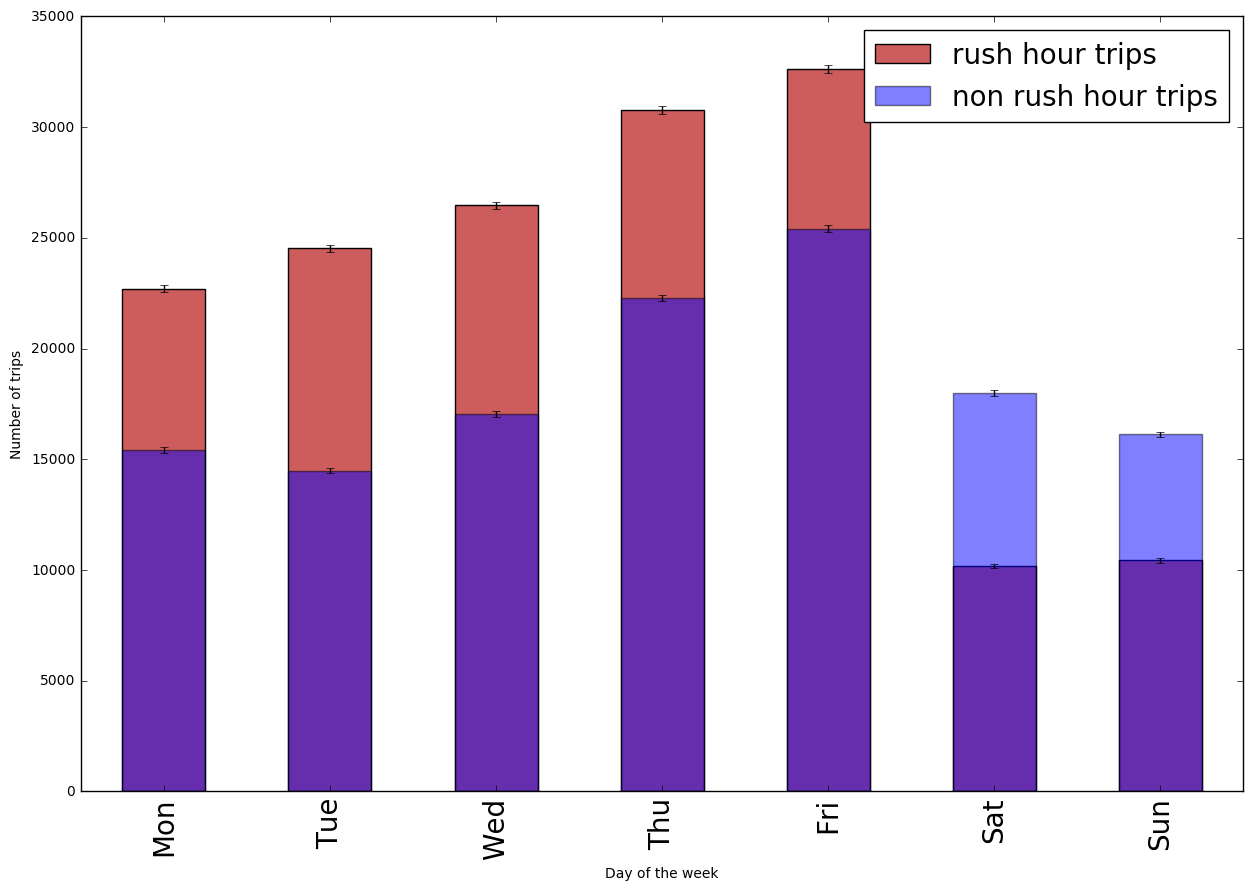

In [97]:
fig=pl.figure(figsize(15,10))

counts_rush = df_rush.date.groupby([df_rush.date.dt.weekday]).count()
norm_rush = 1
error_rush = np.sqrt(counts_rush)
ax=((counts_rush) / norm_rush).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_rush) / norm_rush, (error_rush) / norm_rush)], label = 'rush hour')


counts_nr = df_nr.date.groupby([df_nr.date.dt.weekday]).count()
norm_nr = 1
error_nr=np.sqrt(counts_nr)
ax =((counts_nr) / norm_nr).plot(kind="bar", color ='Blue', alpha=0.5, yerr=[((error_nr) / norm_nr, (error_nr) / norm_nr)], label='Non Rush Hour')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of trips")
ax.set_xlabel ("Day of the week")
pl.legend(['rush hour trips','non rush hour trips'],fontsize=20)

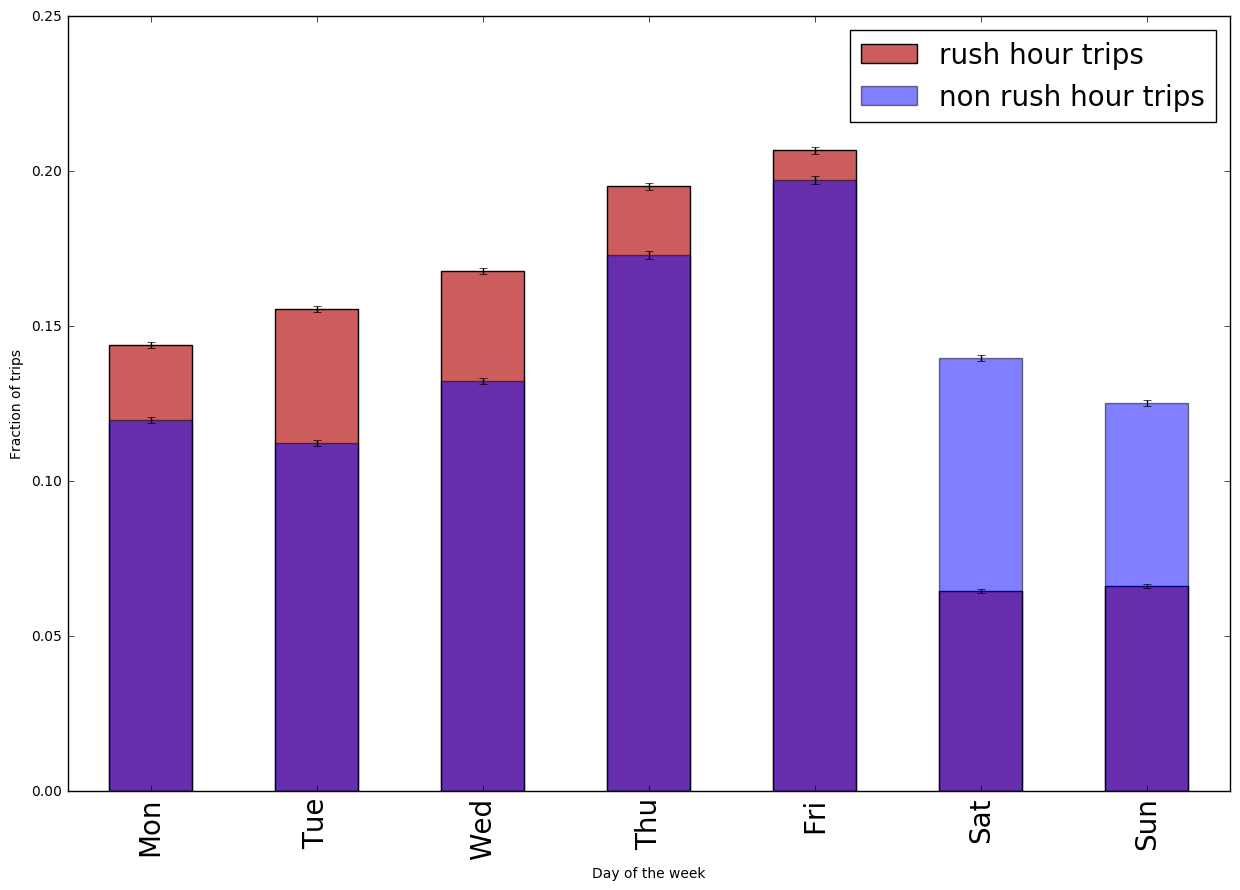

In [96]:
fig = pl.figure(figsize(15,10))

norm_rush = counts_rush.sum()
error_rush = np.sqrt(counts_rush)
((counts_rush) / norm_rush).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_rush) / norm_rush, (error_rush) / norm_rush)], label='rush hour trips')

norm_nr = counts_nr.sum()
ax = ((counts_nr) / norm_nr).plot(kind="bar", alpha=0.5, yerr=[((error_nr)/norm_nr,(error_nr)/norm_nr)], label='non rush hour trips')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Fraction of trips")
ax.set_xlabel ("Day of the week")

pl.legend(['rush hour trips','non rush hour trips'],fontsize=20)